In [398]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
plt.style.use('default')
sns.set_style("whitegrid", {'grid.linestyle': ':'})
import seaborn as sns
import locale
from tabulate import tabulate

In [399]:
# Assuming the data is in CSV format
projects_data = pd.read_csv('suffolk_project_data.csv')
timecard_data = pd.read_csv('suffolk_timecard_data.csv')
construction_log_data = pd.read_csv('suffolk_construction_log_data.csv')
incident_data = pd.read_csv('suffolk_incident_data.csv')

/Users/jonathangregg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [400]:
# Displaying first few rows of each dataset
print("Projects Data:")
print(projects_data.head())

print("\nTimecard Data:")
print(timecard_data.head())

print("\nConstruction Log Data:")
print(construction_log_data.head())

print("\nIncident Data:")
print(incident_data.head())

Projects Data:
                               master_project_number        project_type  \
0  1fb85db3c6b7f30ee073fe50c2758c3b4c190d96a0d515...  CONTRACT FP BURDEN   
1  6f5d8a3fd46275d2b73e57a6613e29cd4cb97f6d2154b3...  CONTRACT FP BURDEN   
2  208b80aefb6e05c0e392d0d3bfca82455bd564923d29a7...  CONTRACT FP BURDEN   
3  2a978ce5500517c7de2d079a23d01c09eb9d0568798483...  CONTRACT FP BURDEN   
4  320139f74dd07b0e25892793cd9f6383c208b1216341fa...  CONTRACT FP BURDEN   

          phase            start_date              end_date project_status  \
0           NaN  2011-03-01T00:00:00Z  2012-06-30T00:00:00Z         Closed   
1  Construction  2021-07-12T00:00:00Z  2023-11-21T00:00:00Z       Approved   
2  Construction  2022-11-01T00:00:00Z  2023-12-31T00:00:00Z         Closed   
3           NaN  2003-09-01T00:00:00Z  2008-08-30T00:00:00Z         Closed   
4  Construction  2023-02-01T00:00:00Z  2024-12-31T00:00:00Z       Approved   

  project_progression_status  percent_complete             

In [401]:
# Check for missing values
print("Missing Values - Projects Data:")
print(projects_data.isnull().sum())

# Check data types
print("\nData Types - Timecard Data:")
print(timecard_data.dtypes)

Missing Values - Projects Data:
master_project_number           0
project_type                    0
phase                         442
start_date                      7
end_date                       10
project_status                  0
project_progression_status      0
percent_complete              104
sbu                             0
market_sector                   0
region                          0
contract_value                  0
actual_cost_to_date           241
current_cost_budget           241
dtype: int64

Data Types - Timecard Data:
master_project_number     object
id_person                  int64
dt_date                   object
cat_task_name             object
cat_task_number           object
cat_job_title             object
cat_employee_group        object
cat_department            object
cat_kor                   object
amt_hours                float64
cat_expenditure_type      object
dtype: object


In [402]:
# Merge timecard data with projects data
merged_data = pd.merge(timecard_data, projects_data, on='master_project_number', how='inner')

In [403]:
# Calculate the average contract value
average_contract_value = projects_data['contract_value'].mean()

average_contract_value

8312632.495652174

In [404]:
# Convert 'start_date' to datetime
projects_data['start_date'] = pd.to_datetime(projects_data['start_date'])

# Filter projects for the last 5 years
current_year = pd.Timestamp.now().year
start_year = current_year - 4  # 5 years ago

projects_last_5_years = projects_data[projects_data['start_date'].dt.year.between(start_year, current_year)]

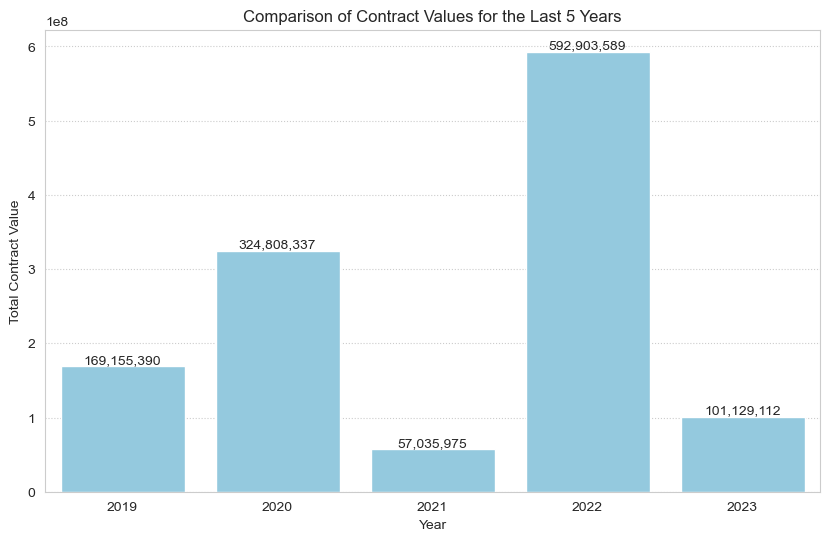

In [405]:
# Group by year and calculate the total contract value for each year
contract_values_by_year = projects_last_5_years.groupby(projects_last_5_years['start_date'].dt.year)['contract_value'].sum()

# Create a bar plot to compare contract values for the last 5 years
plt.figure(figsize=(10, 6))
#contract_values_by_year.plot(kind='bar', color='skyblue')
bar_plot = sns.barplot(x=contract_values_by_year.index, y=contract_values_by_year.values, color='skyblue')
plt.title('Comparison of Contract Values for the Last 5 Years')
plt.xlabel('Year')
plt.ylabel('Total Contract Value')

for index, value in enumerate(contract_values_by_year):
    plt.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom', fontsize=10)

plt.show()

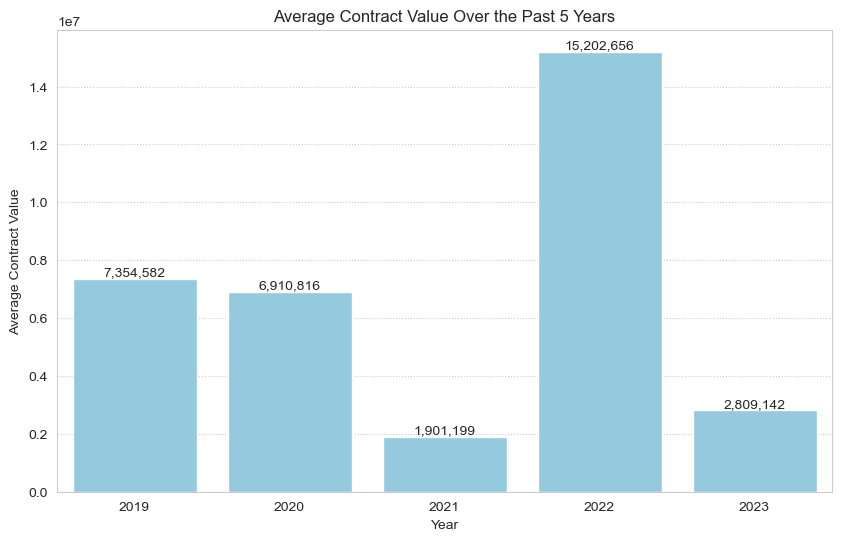

In [406]:
# Calculate the average contract value for each year
average_contract_value_by_year = projects_last_5_years.groupby(projects_last_5_years['start_date'].dt.year)['contract_value'].mean()

# Create a bar plot to visualize the average contract value over the past 5 years
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=average_contract_value_by_year.index, y=average_contract_value_by_year.values, color='skyblue')
#bar_plot = sns.barplot(x=average_contract_value_by_year.index, y=average_contract_value_by_year.values, palette='pastel')
plt.title('Average Contract Value Over the Past 5 Years')
plt.xlabel('Year')
plt.ylabel('Average Contract Value')

# Display whole numbers on top of the bars
for index, value in enumerate(average_contract_value_by_year.values):
    plt.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom', fontsize=10)

plt.show()

In [407]:
# Group by year and calculate the total and average contract value for each year
contract_values_by_year = projects_last_5_years.groupby(projects_last_5_years['start_date'].dt.year)['contract_value'].agg(['sum', 'mean'])

# Rename the columns for clarity
contract_values_by_year.columns = ['Total Contract Value', 'Average Contract Value']

# Format values as whole numbers
contract_values_by_year = contract_values_by_year.applymap('{:,.0f}'.format)

# Display the table using tabulate
table = tabulate(contract_values_by_year, headers='keys', tablefmt='pretty', showindex=True)

print(table)

+------------+----------------------+------------------------+
| start_date | Total Contract Value | Average Contract Value |
+------------+----------------------+------------------------+
|    2019    |     169,155,390      |       7,354,582        |
|    2020    |     324,808,337      |       6,910,816        |
|    2021    |      57,035,975      |       1,901,199        |
|    2022    |     592,903,589      |       15,202,656       |
|    2023    |     101,129,112      |       2,809,142        |
+------------+----------------------+------------------------+


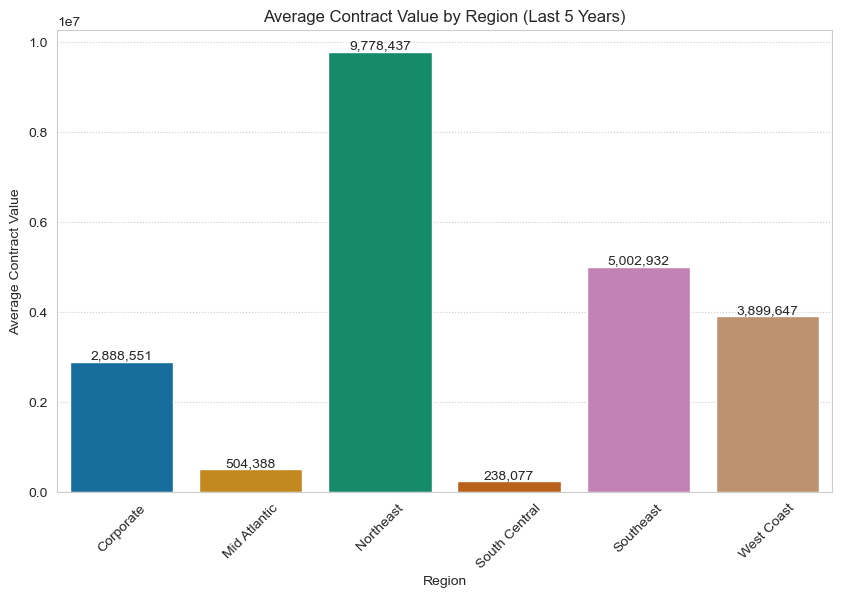

In [408]:
# Group by region and calculate the average contract value for each region
average_contract_value_by_region = projects_last_5_years.groupby('region')['contract_value'].mean()

# Create a bar plot to compare average contract values by region
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=average_contract_value_by_region.index, y=average_contract_value_by_region.values, palette='colorblind')
plt.title('Average Contract Value by Region (Last 5 Years)')
plt.xlabel('Region')
plt.ylabel('Average Contract Value')
plt.xticks(rotation=45)

# Display whole numbers on top of the bars
for index, value in enumerate(average_contract_value_by_region.values):
    plt.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom', fontsize=10)

plt.show()

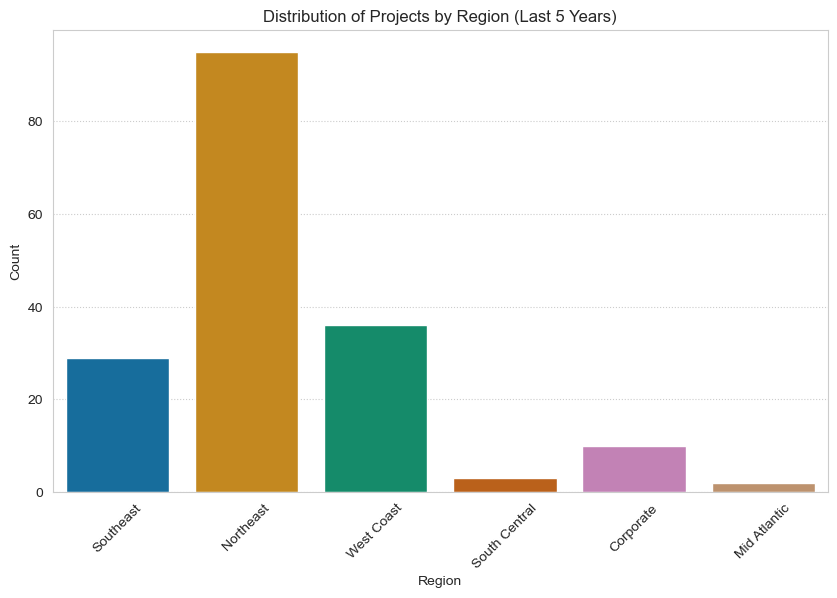

In [409]:
# Create a countplot to visualize the distribution of projects by region
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=projects_last_5_years, palette='colorblind')
plt.title('Distribution of Projects by Region (Last 5 Years)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

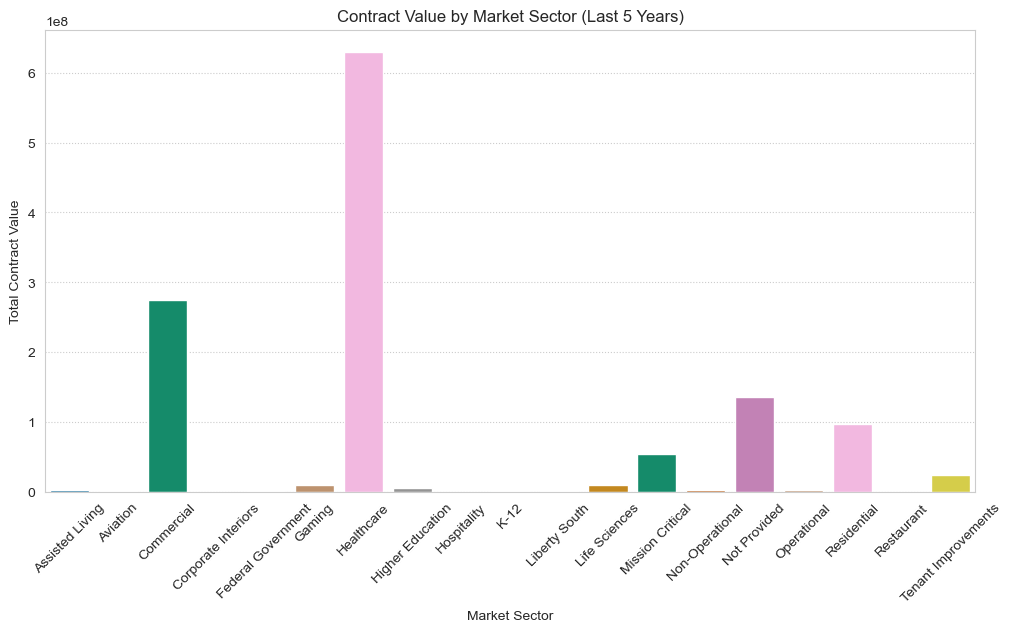

In [410]:
# Convert 'start_date' to datetime
projects_data['start_date'] = pd.to_datetime(projects_data['start_date'])

# Filter projects for the last 5 years
current_year = pd.Timestamp.now().year
start_year = current_year - 4  # 5 years ago

projects_last_5_years = projects_data[projects_data['start_date'].dt.year.between(start_year, current_year)]

# Group by market sector and calculate the total contract value for each sector
contract_value_by_sector = projects_last_5_years.groupby('market_sector')['contract_value'].sum().reset_index()

# Create a bar plot to visualize contract value by market sector
plt.figure(figsize=(12, 6))
sns.barplot(x='market_sector', y='contract_value', data=contract_value_by_sector, palette='colorblind')
plt.title('Contract Value by Market Sector (Last 5 Years)')
plt.xlabel('Market Sector')
plt.ylabel('Total Contract Value')
plt.xticks(rotation=45)

# Display whole numbers on top of the bars
for index, value in enumerate(contract_value_by_sector['contract_value']):
    bar_plot.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom', fontsize=10)

plt.show()

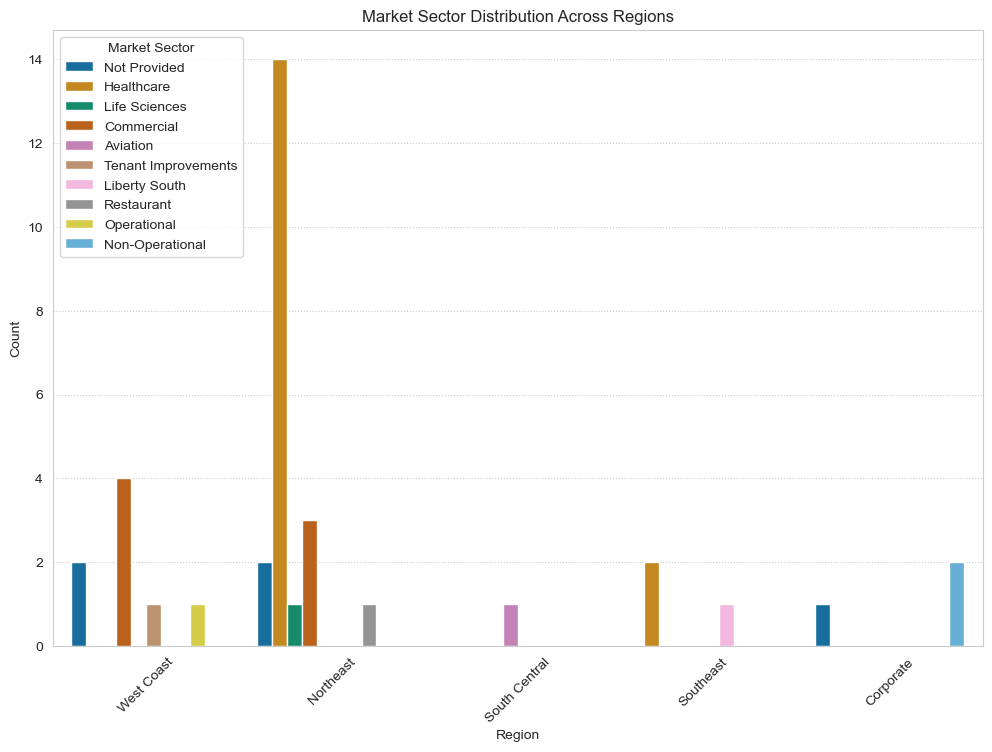

In [411]:
# 10. Market Sector vs. Region Relationships
plt.figure(figsize=(12, 8))
sns.countplot(x='region', hue='market_sector', data=projects_2023, palette='colorblind')
plt.title('Market Sector Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Market Sector')
plt.show()

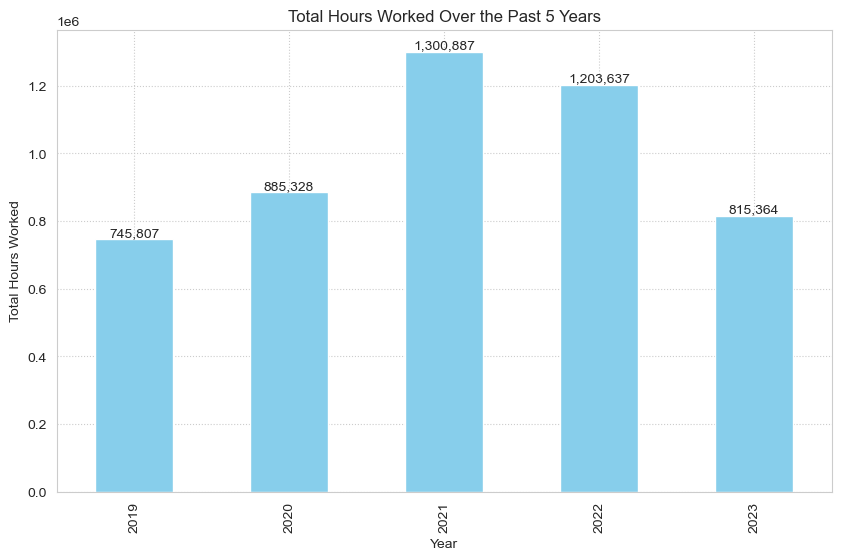

In [412]:
# Convert 'dt_date' to datetime
timecard_data['dt_date'] = pd.to_datetime(timecard_data['dt_date'])

# Filter timecard data for the last 5 years
current_year = pd.Timestamp.now().year
start_year = current_year - 4  # 5 years ago

timecard_last_5_years = timecard_data[timecard_data['dt_date'].dt.year.between(start_year, current_year)]

# Calculate total hours worked for each year
total_hours_by_year = timecard_last_5_years.groupby(timecard_last_5_years['dt_date'].dt.year)['amt_hours'].sum()

# Create a bar plot to visualize total hours worked over the past 5 years
plt.figure(figsize=(10, 6))
bar_plot = total_hours_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Hours Worked Over the Past 5 Years')
plt.xlabel('Year')
plt.ylabel('Total Hours Worked')

# Display whole numbers on top of the bars
for index, value in enumerate(total_hours_by_year.values):
    bar_plot.text(index, value, '{:,.0f}'.format(value), ha='center', va='bottom', fontsize=10)

plt.show()

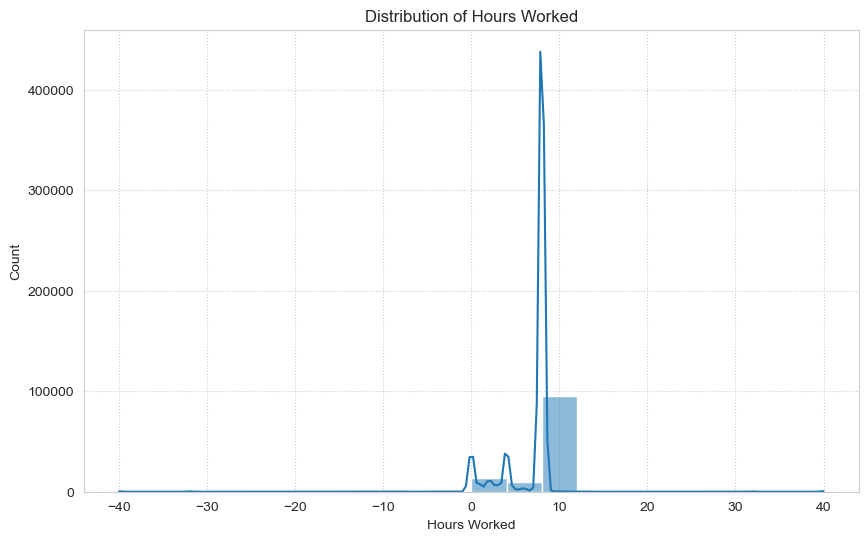

In [413]:
# Hours Worked Distribution
plt.figure(figsize=(10, 6))
sns.histplot(timecard_2023['amt_hours'], bins=20, kde=True)
plt.title('Distribution of Hours Worked')
plt.xlabel('Hours Worked')
plt.ylabel('Count')
plt.show()

In [414]:
# Set the locale to your preferred format (e.g., 'en_US.UTF-8' for English, United States)
locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')

# Group by job title and calculate the total hours worked for each job title
job_title_summary = timecard_data.groupby('cat_job_title')['amt_hours'].sum().reset_index()

# Select the top 10 job titles based on total hours worked
top_job_titles = job_title_summary.nlargest(10, 'amt_hours')

# Format the 'amt_hours' column with commas
top_job_titles['amt_hours'] = top_job_titles['amt_hours'].apply(lambda x: locale.format_string('%d', x, grouping=True))

# Display the top 10 job titles as a table using tabulate
table = tabulate(top_job_titles, headers='keys', tablefmt='pretty', showindex=False, colalign=("left", "right"))

print(table)

+------------------------------+-----------+
| cat_job_title                | amt_hours |
+------------------------------+-----------+
| superintendent               |   898,025 |
| project manager              |   772,988 |
| assistant project manager    |   641,191 |
| assistant superintendent     |   472,518 |
| project engineer             |   427,167 |
| senior superintendent        |   343,861 |
| senior project manager       |   332,276 |
| project executive            |   256,946 |
| project controller           |   178,602 |
| senior project administrator |   145,476 |
+------------------------------+-----------+


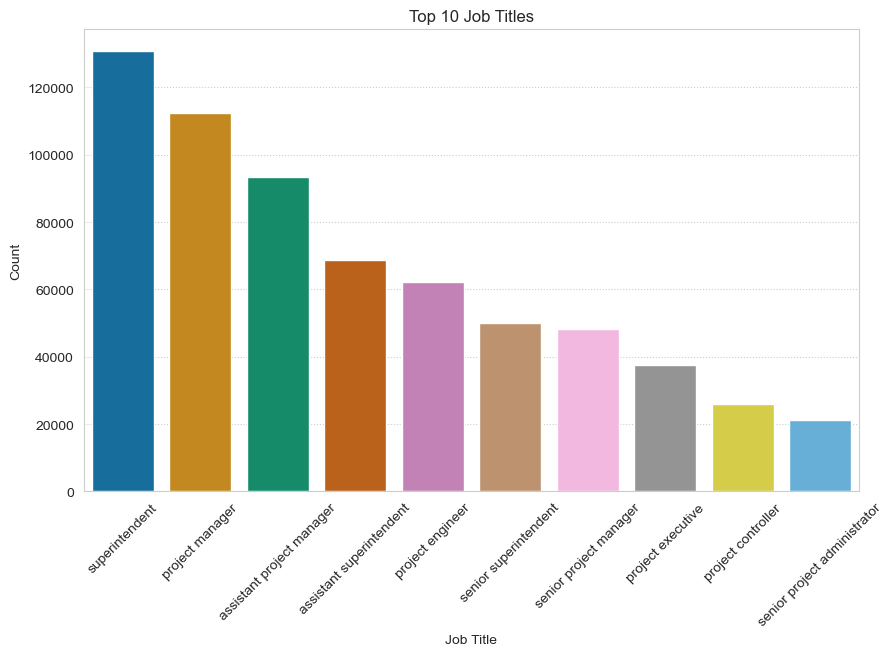

In [416]:
# Top 10 Job Titles
top_job_titles = timecard_data['cat_job_title'].value_counts().head(10)

# Plot the top 5 job titles
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.index, y=top_job_titles.values, palette='colorblind')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

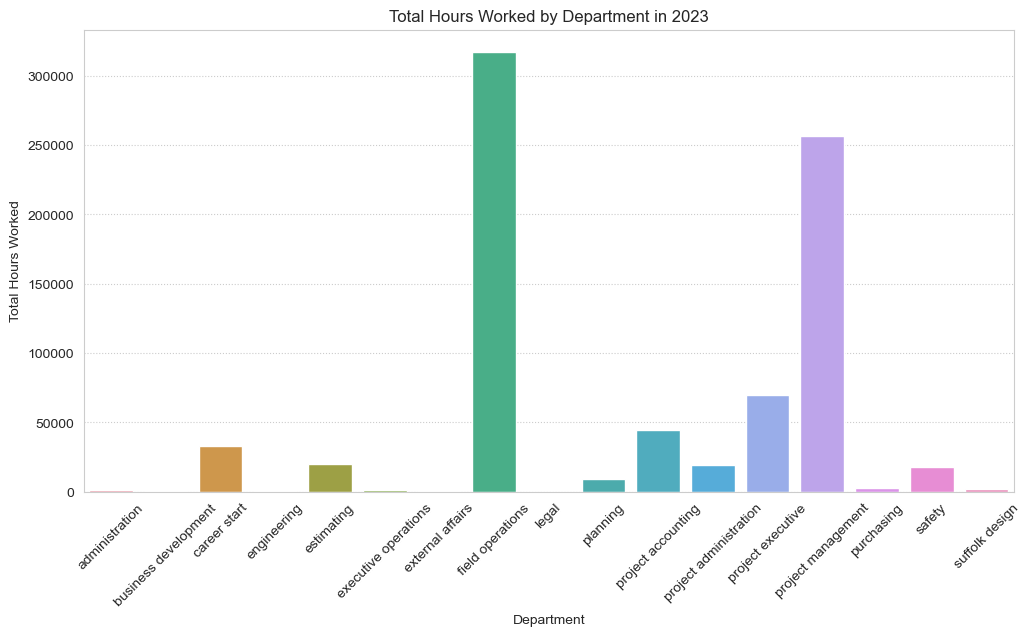

In [418]:
# Convert 'dt_date' to datetime
timecard_data['dt_date'] = pd.to_datetime(timecard_data['dt_date'])

# Filter data for the year 2023
timecard_2023 = timecard_data[timecard_data['dt_date'].dt.year == 2023]

# Calculate total hours worked by department for 2023
total_hours_by_department_2023 = timecard_2023.groupby('cat_department')['amt_hours'].sum().reset_index()

# Plot the total hours worked by department for 2023 using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='cat_department', y='amt_hours', data=total_hours_by_department_2023, ci=None)
plt.title('Total Hours Worked by Department in 2023')
plt.xlabel('Department')
plt.ylabel('Total Hours Worked')
plt.xticks(rotation=45)
plt.show()

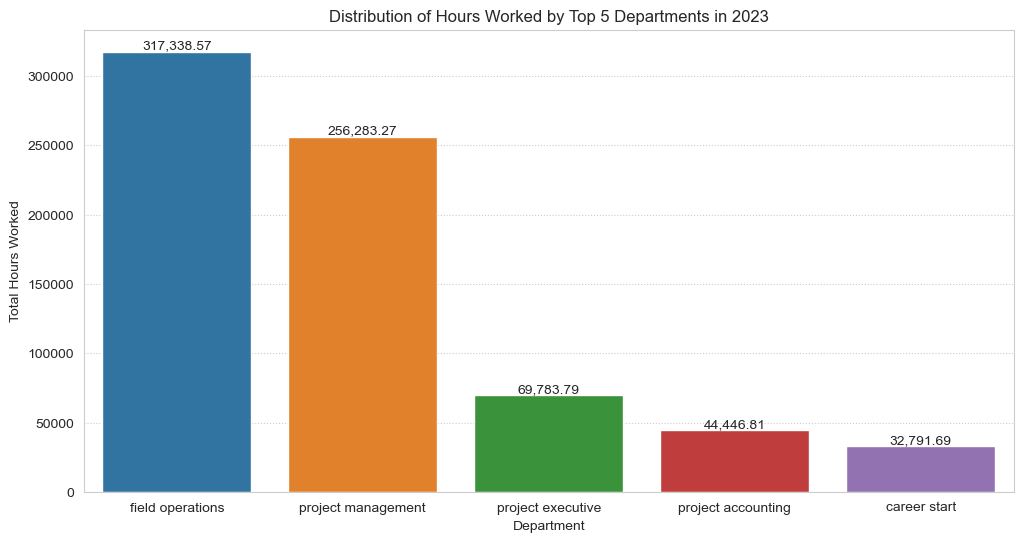

In [419]:
# Convert 'dt_date' to datetime
timecard_data['dt_date'] = pd.to_datetime(timecard_data['dt_date'])

# Filter data for the year 2023
timecard_2023 = timecard_data[timecard_data['dt_date'].dt.year == 2023]

# Group by department and calculate the total hours worked for each department
hours_by_department = timecard_2023.groupby('cat_department')['amt_hours'].sum().reset_index()

# Sort departments by total hours worked in descending order and select the top 5
top_departments = hours_by_department.sort_values(by='amt_hours', ascending=False).head(5)

# Plot the distribution of hours worked by the top 5 departments for 2023
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='cat_department', y='amt_hours', data=top_departments)
plt.title('Distribution of Hours Worked by Top 5 Departments in 2023')
plt.xlabel('Department')
plt.ylabel('Total Hours Worked')

# Display total hours worked on top of the bars
for index, value in enumerate(top_departments['amt_hours']):
    bar_plot.text(index, value, '{:,.2f}'.format(value), ha='center', va='bottom', fontsize=10)

plt.show()

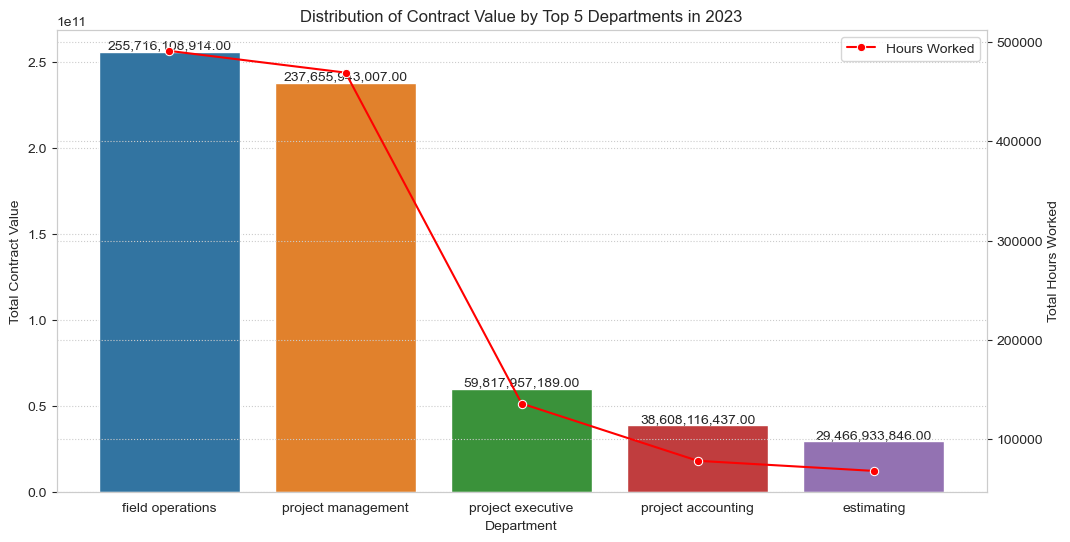

In [420]:
# Filter project data for the year 2023
project_2023 = projects_data[projects_data['start_date'].dt.year == 2023]

# Merge project data with timecard data
merged_data = pd.merge(project_2023, timecard_data, on='master_project_number', how='inner')

# Group by department and calculate the total contract value and total hours worked for each department
department_summary = merged_data.groupby('cat_department').agg({
    'contract_value': 'sum',
    'amt_hours': 'sum'
}).reset_index()

# Select the top 5 departments based on total contract value
top_departments = department_summary.nlargest(5, 'contract_value')

# Plot the distribution of contract value and hours worked by the top 5 departments for 2023
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='cat_department', y='contract_value', data=top_departments)
plt.title('Distribution of Contract Value by Top 5 Departments in 2023')
plt.xlabel('Department')
plt.ylabel('Total Contract Value')

# Display total contract value on top of the bars
for index, value in enumerate(top_departments['contract_value']):
    bar_plot.text(index, value, '{:,.2f}'.format(value), ha='center', va='bottom', fontsize=10)

# Add a secondary y-axis for hours worked
ax2 = bar_plot.twinx()
ax2 = sns.lineplot(x='cat_department', y='amt_hours', data=top_departments, color='red', marker='o', label='Hours Worked')
ax2.set_ylabel('Total Hours Worked')

plt.show()

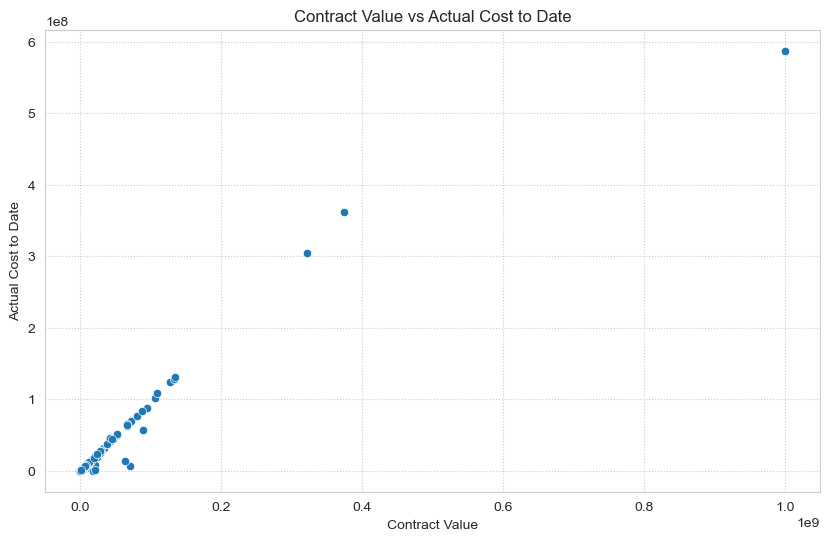

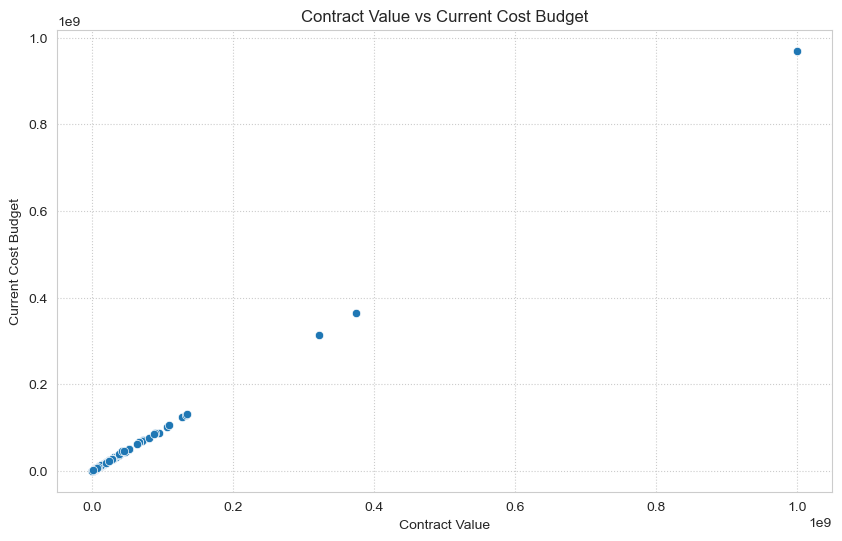

In [422]:
# Drop rows with missing values in relevant columns
filtered_projects = projects_data.dropna(subset=['contract_value', 'actual_cost_to_date', 'current_cost_budget'])

# Scatter plot between contract_value and actual_cost_to_date
plt.figure(figsize=(10, 6))
sns.scatterplot(x='contract_value', y='actual_cost_to_date', data=filtered_projects)
plt.title('Contract Value vs Actual Cost to Date')
plt.xlabel('Contract Value')
plt.ylabel('Actual Cost to Date')
plt.show()

# Scatter plot between contract_value and current_cost_budget
plt.figure(figsize=(10, 6))
sns.scatterplot(x='contract_value', y='current_cost_budget', data=filtered_projects)
plt.title('Contract Value vs Current Cost Budget')
plt.xlabel('Contract Value')
plt.ylabel('Current Cost Budget')
plt.show()

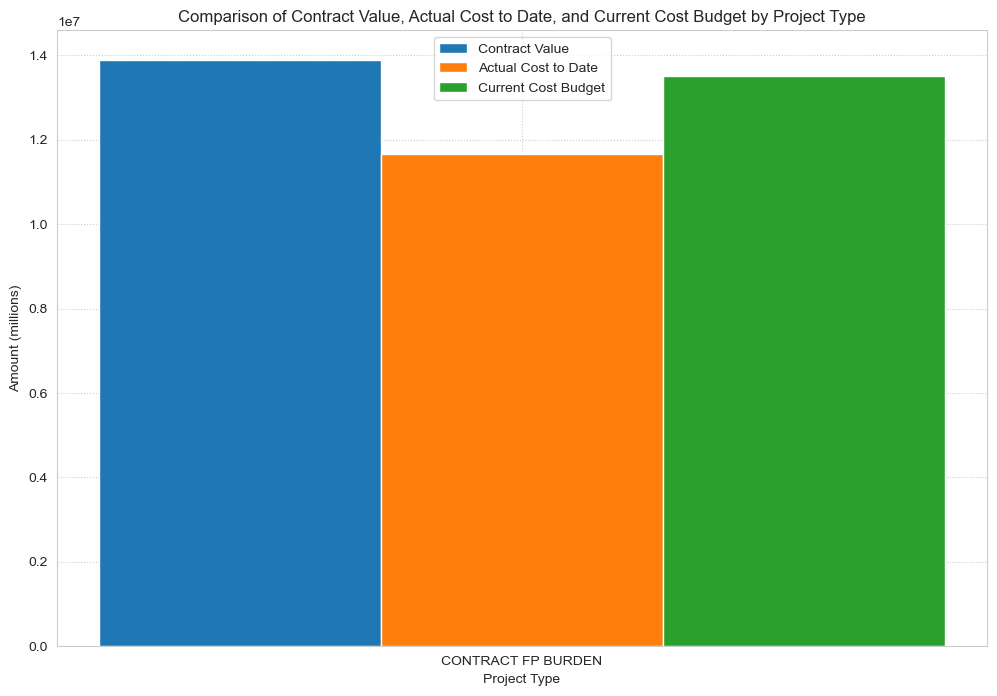

In [431]:
# Drop rows with missing values in relevant columns
filtered_projects = projects_data.dropna(subset=['contract_value', 'actual_cost_to_date', 'current_cost_budget'])

# Group by a categorical variable (e.g., project types)
grouped_projects = filtered_projects.groupby('project_type').agg({
    'contract_value': 'mean',  # You can use 'mean', 'sum', or other aggregation functions
    'actual_cost_to_date': 'mean',
    'current_cost_budget': 'mean'
}).reset_index()

# Plot the grouped bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.2
bar_positions = range(len(grouped_projects))

plt.bar(bar_positions, grouped_projects['contract_value'], width=bar_width, label='Contract Value')
plt.bar([pos + bar_width for pos in bar_positions], grouped_projects['actual_cost_to_date'], width=bar_width, label='Actual Cost to Date')
plt.bar([pos + 2 * bar_width for pos in bar_positions], grouped_projects['current_cost_budget'], width=bar_width, label='Current Cost Budget')

# Customize the plot
plt.title('Comparison of Contract Value, Actual Cost to Date, and Current Cost Budget by Project Type')
plt.xlabel('Project Type')
plt.ylabel('Amount (millions)')
plt.xticks([pos + bar_width for pos in bar_positions], grouped_projects['project_type'])
plt.legend()

plt.show()